In [5]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Train_data.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


# A1

In [7]:
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X_train, _ = make_blobs(n_samples=1000, centers=2, random_state=42)
X_test, _ = make_blobs(n_samples=500, centers=2, random_state=42)

X = np.vstack([X_train, X_test])
X = X[:, :-1]
k = 3
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)

clustered_data = pd.DataFrame(np.column_stack([X, clusters]), columns=[f'feature_{i}' for i in range(X.shape[1])] + ['cluster_label'])
print(clustered_data.head())

   feature_0  cluster_label
0  -1.673506            2.0
1   6.317580            1.0
2   3.543604            1.0
3   5.162714            1.0
4   4.459399            1.0


# A2

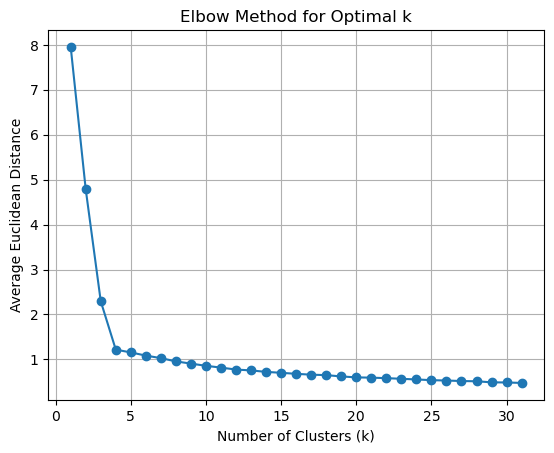

The optimal value for k is: 1


In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
import warnings

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

def calculate_average_distance(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    return np.mean(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))
k_values = range(1, 32)

warnings.filterwarnings("ignore")
average_distances = [calculate_average_distance(X, k) for k in k_values]
warnings.filterwarnings("default")

plt.plot(k_values, average_distances, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.grid(True)
plt.show()

optimal_k = np.argmin(np.diff(average_distances)) + 1
print(f'The optimal value for k is: {optimal_k}')

# A3

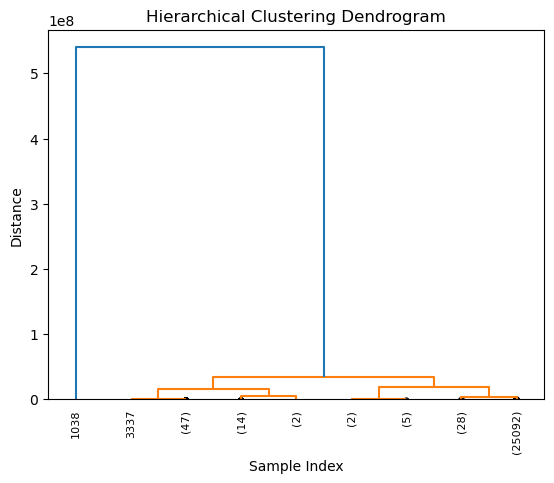

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df is your DataFrame

# Drop non-numeric columns for clustering
numeric_columns = df.select_dtypes(include=[np.number])
X = numeric_columns.values

# Perform hierarchical clustering
linkage_matrix = linkage(X, method='ward')  # You can try other linkage methods as well

# Plot the dendrogram
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90., leaf_font_size=8., show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# A4

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame

# Separate features (X) and target variable (y)
X = df.drop('class', axis=1)  # Exclude the target variable
y = df['class']

# One-hot encode categorical variables
categorical_columns = ['protocol_type', 'service', 'flag']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Choose a classifier (KNN in this example)
clf = KNeighborsClassifier(n_neighbors=3)

# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(clf, n_features_to_select=5, direction='forward', n_jobs=-1)
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features_indices = sfs.get_support(indices=True)

# Use the selected features for training and testing
X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# Train the model with selected features
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_selected)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy}")


Accuracy with selected features: 0.9962294105973407


# A5

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your dataset is stored in a variable called 'df'
# Drop the 'class' column as it is not needed for PCA
X = df.drop('class', axis=1)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.difference(categorical_columns)),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_transformed)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to capture 95% of the variance
k = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Display the results
print(f"Number of components needed to capture 95% of variance: {k}")

Number of components needed to capture 95% of variance: 23


# A6

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your original dataset is stored in a variable called 'df'
# Drop the 'class' column as it is not needed for PCA
X = df.drop('class', axis=1)
y = df['class']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns.difference(categorical_columns)),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Apply the transformations
X_transformed = preprocessor.fit_transform(X)

# Perform PCA with the initial KPCs
k = 23  # Replace with the value of K you obtained from PCA
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_transformed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using transformed dataset: {accuracy:.2f}")


Accuracy using transformed dataset: 1.00
